# PROJETO LIT - DESAFIO 6 MARATONA BEHIND THE CODE

## Importando as bibliotecas base e os datasets

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import sweetviz
import numpy as np


In [2]:
#!pip install sweetviz

In [3]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv
treino = pd.read_csv(r'training_dataset.csv')
treino.tail()

--2020-08-30 21:44:12--  https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1736600 (1.7M) [text/plain]
Saving to: ‘training_dataset.csv.2’

training_dataset.cs 100%[===================>]   1.66M  --.-KB/s    in 0.1s    

2020-08-30 21:44:12 (12.8 MB/s) - ‘training_dataset.csv.2’ saved [1736600/1736600]



,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
15852,620397030.0,Bacharelado,UFF,Outros,Borracha,0.0,0.0,1.0,8.0,NaN,10.0,NaN,NaN,NaN,perfil6
15853,229931283.0,Bacharelado,NaN,Advogado,NaN,0.0,0.0,1.0,7.0,Linkedin,42.0,17.0,15.0,NaN,perfil5
15854,480674907.0,Tecnólogo,UNIP,Sócio/Dono/Proprietário,NaN,0.0,NaN,1.0,7.0,Outros,30.0,9.0,8.0,0.0,perfil5
15855,559626807.0,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,NaN,226.0,102.0,93.0,1.0,perfil1
15856,743652801.0,NaN,FGV-RJ,NaN,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.0,97.0,1.0,perfil1


In [4]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv
teste= pd.read_csv(r'to_be_scored.csv')
teste.tail()

--2020-08-30 21:44:29--  https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96291 (94K) [text/plain]
Saving to: ‘to_be_scored.csv.2’

to_be_scored.csv.2  100%[===================>]  94.03K  --.-KB/s    in 0.03s   

2020-08-30 21:44:30 (2.80 MB/s) - ‘to_be_scored.csv.2’ saved [96291/96291]



,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados
995,741745189,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Coordenador,Borracha,0,0,1,2,YouTube,245,63,45,1
996,996387882,Bacharelado,UFRN,Assessor,Estado,1,1,1,8,Google,163,111,96,0
997,668869418,Bacharelado,UFSCar,Gerente,Siderurgica,1,1,1,9,Facebook,56,10,4,0
998,676531718,Tecnólogo,FATEC,Outros,servicos,1,1,1,9,Mídia (revista/jornal/web),138,60,30,0
999,388402340,Especialização,UNIP,Advogado,Montadora,0,0,1,9,Mídia (revista/jornal/web),22,20,19,0


## Análise Exploratória

In [5]:
treino.columns

Index(['id', 'graduacao', 'universidade', 'profissao', 'organizacao',
       'pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo',
       'como_conheceu_lit', 'total_modulos', 'modulos_iniciados',
       'modulos_finalizados', 'certificados', 'categoria'],
      dtype='object')

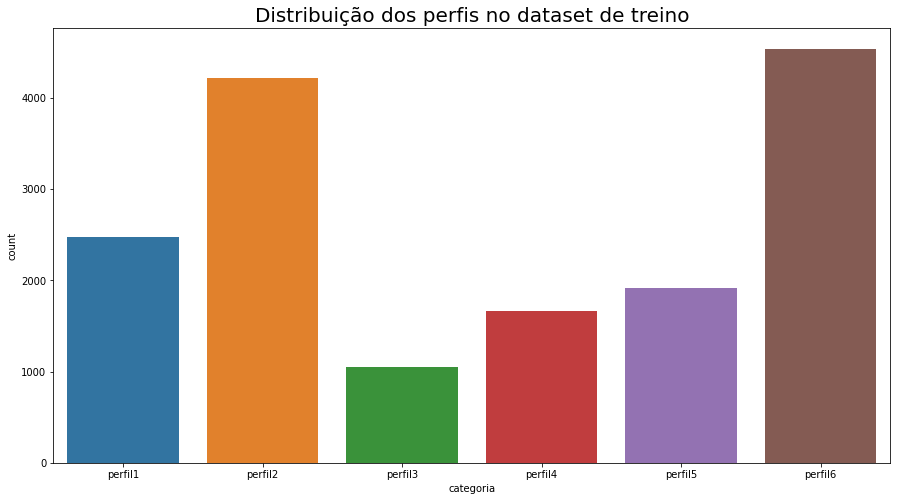

In [6]:
#conferindo a distribuição dos perfis
plt.figure(figsize=(15,8))
ax = sns.countplot(treino['categoria'].sort_values())
ax.set_title('Distribuição dos perfis no dataset de treino', fontsize=20);

In [7]:
#conferindo a distribuição dos perfis no dataset de treino
treino['categoria'].value_counts(normalize=True)

perfil6    0.286246
perfil2    0.265813
perfil1    0.155893
perfil5    0.120893
perfil4    0.104749
perfil3    0.066406
Name: categoria, dtype: float64

In [8]:
#conferindo quantidade de alunos por perfil
treino['categoria'].value_counts()

perfil6    4539
perfil2    4215
perfil1    2472
perfil5    1917
perfil4    1661
perfil3    1053
Name: categoria, dtype: int64

In [9]:
#vendo apenas as variáveis categóricas
treino.select_dtypes(exclude='number')


,graduacao,universidade,profissao,organizacao,como_conheceu_lit,categoria
0,Especialização,UNIP,Analista Senior,Eletrodomesticos,Google,perfil6
1,MBA,NaN,Supervisor,e-commerce,NaN,perfil2
2,Bacharelado,UNICAMP,Outros,e-commerce,Saint Paul,perfil2
3,SEM FORMAÇÃO,UFRN,Outros,Eletroeletronicos,Instagram,perfil5
4,Tecnólogo,INSPER INSTITUTO DE ENSINO E PESQUISA,SEM EXPERIÊNCIA,Eletrodomesticos,Google,perfil2
...,...,...,...,...,...,...
15852,Bacharelado,UFF,Outros,Borracha,NaN,perfil6
15853,Bacharelado,NaN,Advogado,NaN,Linkedin,perfil5
15854,Tecnólogo,UNIP,Sócio/Dono/Proprietário,NaN,Outros,perfil5
15855,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,NaN,perfil1


###  Cruzando as variáveis categóricas

In [10]:
#verificando perfil vs graduacao
cross = pd.crosstab(treino.graduacao, treino.categoria)
cross

categoria,perfil1,perfil2,perfil3,perfil4,perfil5,perfil6
graduacao,,,,,,
Bacharelado,383,632,163,239,287,625
Especialização,351,646,151,265,262,646
Licenciatura,366,642,149,255,276,710
MBA,361,593,163,245,281,668
SEM FORMAÇÃO,349,578,155,224,287,702
Tecnólogo,345,617,147,237,304,646


In [11]:
#perfil vs universidade
cross2 = pd.crosstab(treino.universidade, treino.categoria)
cross2

categoria,perfil1,perfil2,perfil3,perfil4,perfil5,perfil6
universidade,,,,,,
CENTRO UNIVERSITÁRIO ESTÁCIO DA SÁ,113,144,33,59,88,168
Escola Paulista de Direito,84,202,39,78,79,195
FACULDADE ANHANGUERA,119,197,47,72,80,157
FATEC,100,159,38,64,85,175
FGV-RJ,76,156,53,76,82,208
INSPER INSTITUTO DE ENSINO E PESQUISA,107,183,39,71,83,213
UEPB,106,204,45,71,75,193
UFF,99,170,49,60,71,182
UFPE,115,193,47,59,83,199


In [12]:
#perfil vs organização
cross = pd.crosstab(treino.organizacao, treino.categoria)
cross

categoria,perfil1,perfil2,perfil3,perfil4,perfil5,perfil6
organizacao,,,,,,
Borracha,192,335,87,141,148,350
Eletrodomesticos,196,346,91,138,139,371
Eletroeletronicos,207,354,90,136,157,375
Entretenimento,211,340,86,130,151,359
Estado,193,320,85,148,172,363
Laminados,183,321,84,133,156,353
Montadora,176,345,78,137,159,368
Oleo e Gas,208,336,78,131,160,360
Siderurgica,213,355,91,135,130,367


In [13]:
#perfil vs organização
cross = pd.crosstab(treino.categoria, treino.como_conheceu_lit)
cross

como_conheceu_lit,Facebook,Google,Instagram,Linkedin,Minha empresa - benefício LITpass,Mídia (revista/jornal/web),Outros,Saint Paul,YouTube
categoria,,,,,,,,,
perfil1,211,216,212,232,201,207,461,218,228
perfil2,369,387,382,371,311,375,757,366,352
perfil3,90,98,93,94,95,92,180,101,77
perfil4,158,156,138,148,157,141,287,135,145
perfil5,186,167,146,179,181,144,379,156,150
perfil6,411,391,377,425,407,419,767,381,408


In [14]:
#perfil vs profissao
cross = pd.crosstab(treino.profissao, treino.categoria)
cross

categoria,perfil1,perfil2,perfil3,perfil4,perfil5,perfil6
profissao,,,,,,
Advogado,179,327,90,122,142,345
Analista,187,319,87,101,153,315
Analista Senior,203,312,75,117,130,359
Assessor,171,314,72,115,153,330
Coordenador,175,327,78,107,150,326
Diretor,178,346,81,126,130,357
Engenheiro,180,287,72,139,116,305
Gerente,172,290,78,121,138,352
Outros,196,297,77,129,152,323


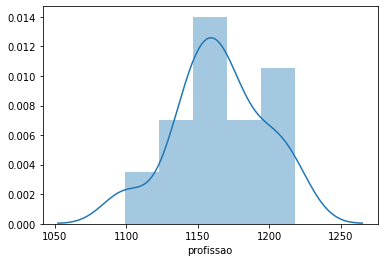

In [15]:
sns.distplot(treino.profissao.value_counts());


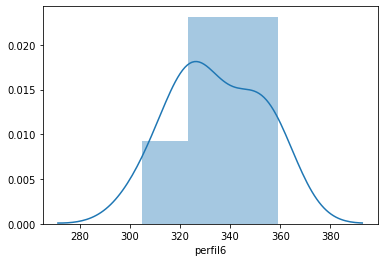

In [16]:
sns.distplot(cross.perfil6);

In [17]:
#perfil vs pretende fazer cursos
cross = pd.crosstab(treino.categoria, treino.pretende_fazer_cursos_lit)
cross

pretende_fazer_cursos_lit,0.0,1.0
categoria,,
perfil1,1076,1088
perfil2,1910,1821
perfil3,451,458
perfil4,743,737
perfil5,843,855
perfil6,2012,1995


In [18]:
#perfil vs interesse no mba
cross = pd.crosstab(treino.categoria, treino.interesse_mba_lit)
cross

interesse_mba_lit,0.0,1.0
categoria,,
perfil1,1088,1111
perfil2,1916,1798
perfil3,452,467
perfil4,748,744
perfil5,834,838
perfil6,2020,1987


In [19]:
#perfil vs importante ter certificado
cross = pd.crosstab(treino.categoria, treino.importante_ter_certificado)
cross

importante_ter_certificado,1.0
categoria,
perfil1,2149
perfil2,3695
perfil3,922
perfil4,1450
perfil5,1694
perfil6,4008


In [20]:
#valores únicos  de certificados
treino.certificados.unique()

array([ 0.,  2.,  4., nan,  3.,  1.,  6., 11.,  5.,  9.,  7., 15., 20.,
        8., 29., 10., 18., 17., 14., 12., 13., 25., 16., 32.])

### Verificações de variáveis numéricas

In [21]:
#vendo as variáveis numéricas
treino.select_dtypes(include='number')

,id,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados
0,915132186.0,1.0,1.0,1.0,6.0,28.0,5.0,4.0,0.0
1,183037660.0,0.0,0.0,1.0,6.0,66.0,36.0,34.0,0.0
2,681614019.0,1.0,1.0,1.0,10.0,27.0,27.0,27.0,0.0
3,398921329.0,NaN,1.0,1.0,5.0,29.0,10.0,6.0,0.0
4,522842284.0,NaN,0.0,1.0,7.0,67.0,49.0,44.0,0.0
...,...,...,...,...,...,...,...,...,...
15852,620397030.0,0.0,0.0,1.0,8.0,10.0,NaN,NaN,NaN
15853,229931283.0,0.0,0.0,1.0,7.0,42.0,17.0,15.0,NaN
15854,480674907.0,0.0,NaN,1.0,7.0,30.0,9.0,8.0,0.0
15855,559626807.0,0.0,0.0,1.0,10.0,226.0,102.0,93.0,1.0


In [22]:
#Média por perfil
treino.groupby('categoria').mean()[['modulos_iniciados', 'modulos_finalizados','horas_semanais_estudo', 'total_modulos', 'certificados']]

,modulos_iniciados,modulos_finalizados,horas_semanais_estudo,total_modulos,certificados
categoria,,,,,
perfil1,80.086543,70.732218,5.958257,125.942103,1.873175
perfil2,60.043525,49.817615,6.056421,119.932605,0.085009
perfil3,25.981953,20.255091,5.963519,66.995731,0.082177
perfil4,20.612245,15.974778,6.061224,57.528405,0.062244
perfil5,14.241097,10.350612,6.097403,46.673784,0.056852
perfil6,10.621303,7.777862,5.972482,38.158897,0.080993


In [39]:
#Mediana por perfil
treino.groupby('categoria').median()[['modulos_iniciados', 'modulos_finalizados','horas_semanais_estudo', 'total_modulos', 'certificados']]

,modulos_iniciados,modulos_finalizados,horas_semanais_estudo,total_modulos,certificados
categoria,,,,,
perfil1,57.0,49.0,6.0,87.0,1.0
perfil2,42.0,34.0,6.0,85.0,0.0
perfil3,21.0,17.0,6.0,41.0,0.0
perfil4,15.0,11.0,6.0,38.0,0.0
perfil5,9.0,7.0,6.0,31.0,0.0
perfil6,4.0,2.0,6.0,29.0,0.0


In [45]:
#Desvio Padrão por perfil
treino.groupby('categoria').std()[['modulos_iniciados', 'modulos_finalizados','horas_semanais_estudo', 'total_modulos', 'certificados']]

,modulos_iniciados,modulos_finalizados,horas_semanais_estudo,total_modulos,certificados
categoria,,,,,
perfil1,90.896034,79.021680,2.553979,154.783711,2.239509
perfil2,61.903851,52.907952,2.609090,128.679553,0.579063
perfil3,27.363393,22.995971,2.553984,71.099890,0.579818
perfil4,42.489441,41.195124,2.602885,64.388887,0.430952
perfil5,21.362216,19.393288,2.584534,50.617203,0.423557
perfil6,25.466078,23.710269,2.605065,48.884460,0.604896


In [106]:
# estatísticas descritivas das variáveis contínuas
treino.groupby('categoria')[['modulos_iniciados', 'modulos_finalizados','horas_semanais_estudo', 'total_modulos', 'certificados']].describe()

modulos_iniciados                             ... certificados                
                      count       mean        std  min  ...          25%  50%  75%   max
categoria                                               ...                             
perfil1              2207.0  80.086543  90.896034  1.0  ...          1.0  1.0  3.0  32.0
perfil2              3722.0  60.043525  61.903851  1.0  ...          0.0  0.0  0.0  15.0
perfil3               942.0  25.981953  27.363393  2.0  ...          0.0  0.0  0.0   9.0
perfil4              1470.0  20.612245  42.489441  1.0  ...          0.0  0.0  0.0   6.0
perfil5              1713.0  14.241097  21.362216  1.0  ...          0.0  0.0  0.0   6.0
perfil6              3990.0  10.621303  25.466078  1.0  ...          0.0  0.0  0.0  20.0

[6 rows x 40 columns]

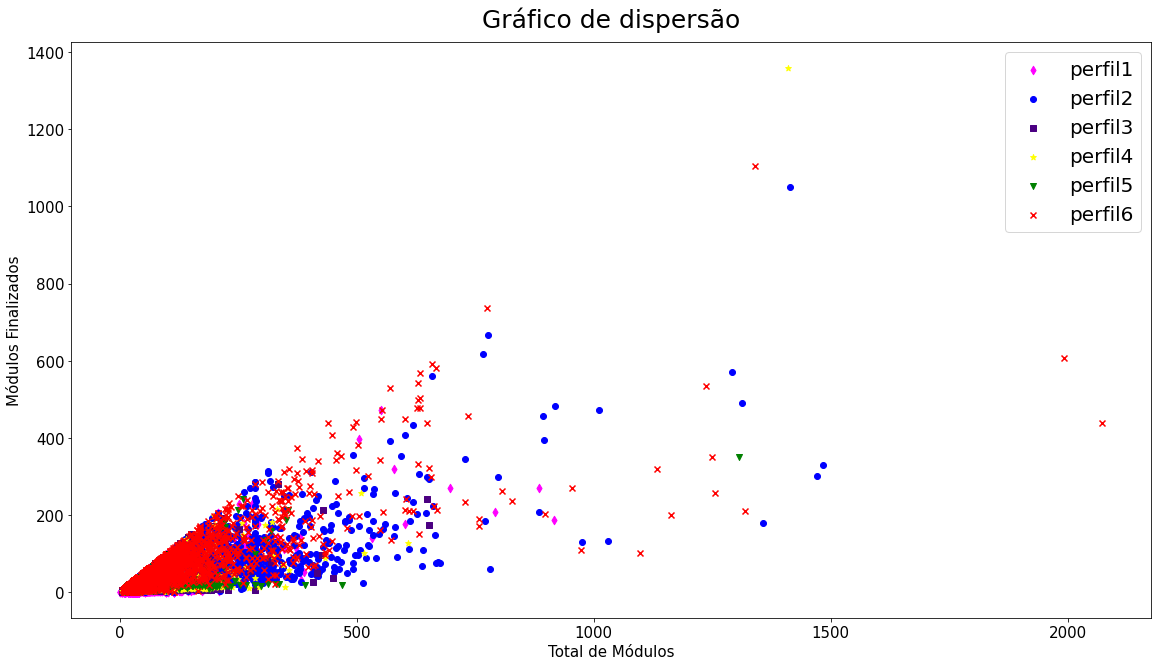

In [51]:
#aumentando o tamanho do marcador
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])

cores = {'perfil1': 'r', 'perfil2': 'b', 'perfil3':'g', 'perfil4':'yellow', 'perfil5':'indigo', 'perfil6':'magenta'}
marcadores = {'perfil1': 'x', 'perfil2': 'o', 'perfil3':'v', 'perfil4':'*', 'perfil5':'s', 'perfil6':'d'}
for perfil in treino['categoria'].unique():
  tmp = treino[treino['categoria'] == perfil]
  eixo.scatter(tmp['total_modulos'], tmp['modulos_finalizados'], color = cores[perfil], marker=marcadores[perfil])

#eixo.scatter(iris['comprimento_sépala'], iris['largura_sépala'])
eixo.set_title('Gráfico de dispersão', fontsize=25, pad=15)
eixo.set_xlabel('Total de Módulos', fontsize=15)
eixo.set_ylabel('Módulos Finalizados', fontsize=15)
eixo.tick_params(labelsize=15)
eixo.legend(cores,fontsize=20);

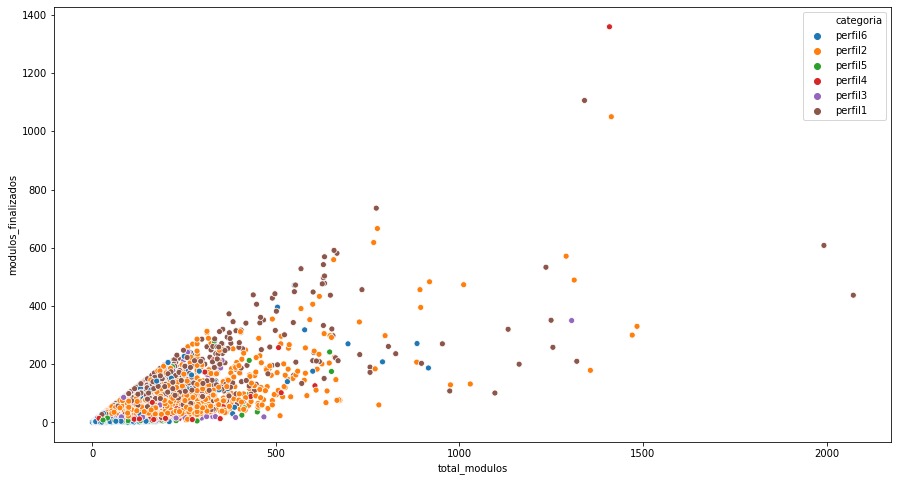

In [104]:
#mesma coisa só que usando o seaborn
fig = plt.figure(figsize=(15,8))
sns.scatterplot(x='total_modulos', y='modulos_finalizados', hue='categoria', data=treino);

In [57]:
y = treino['modulos_iniciados']

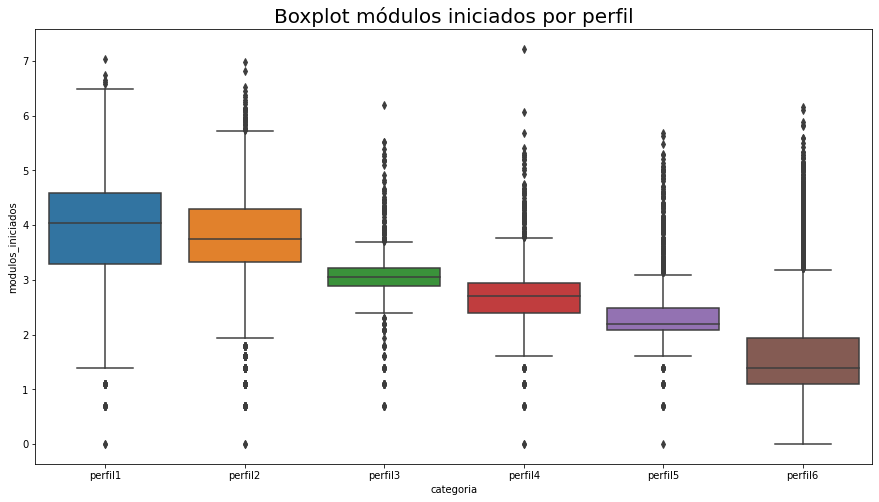

In [63]:
#boxplot
def boxplot(y, title):
  fig = plt.figure(figsize=(15,8))
  ax = sns.boxplot(x=treino['categoria'].sort_values(), y=np.log(y), data=treino)
  ax.set_title(title, fontsize = 20);
boxplot(y, 'Boxplot módulos iniciados por perfil')

In [52]:
y = treino['modulos_finalizados']

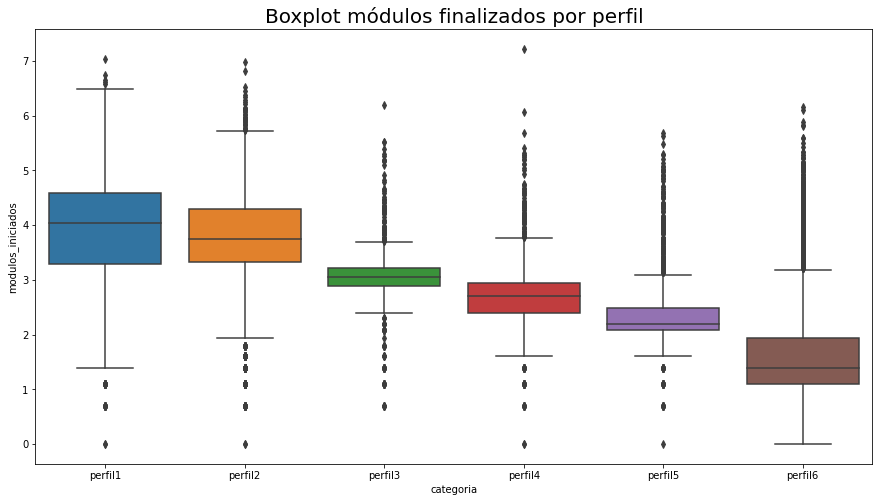

In [64]:
boxplot(y, 'Boxplot módulos finalizados por perfil')

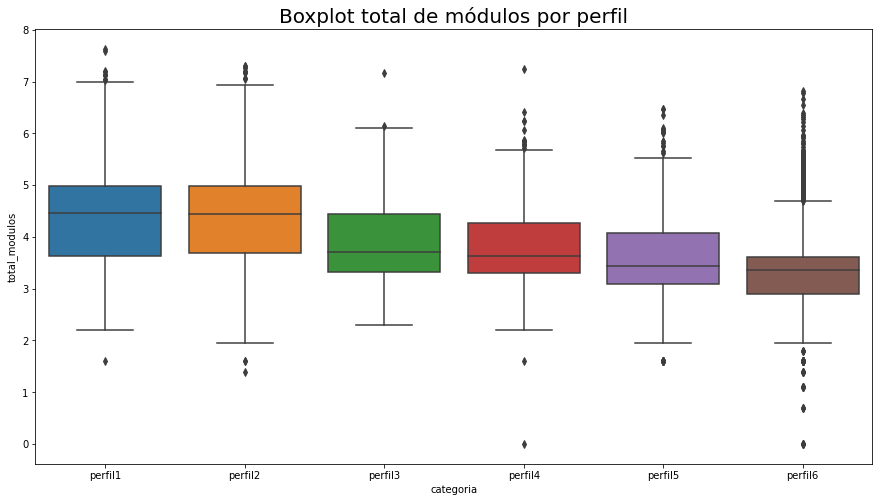

In [66]:
y = treino['total_modulos']
boxplot(y, 'Boxplot total de módulos por perfil')


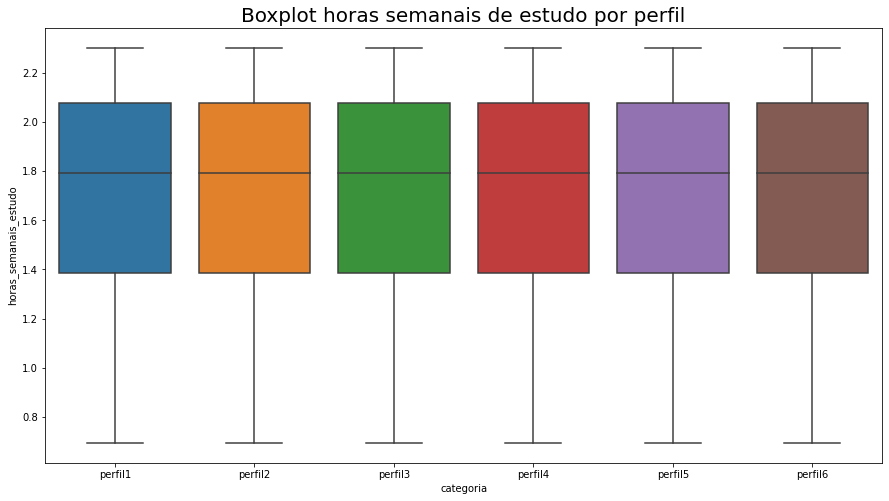

In [67]:
y = treino['horas_semanais_estudo']
boxplot(y, 'Boxplot horas semanais de estudo por perfil')

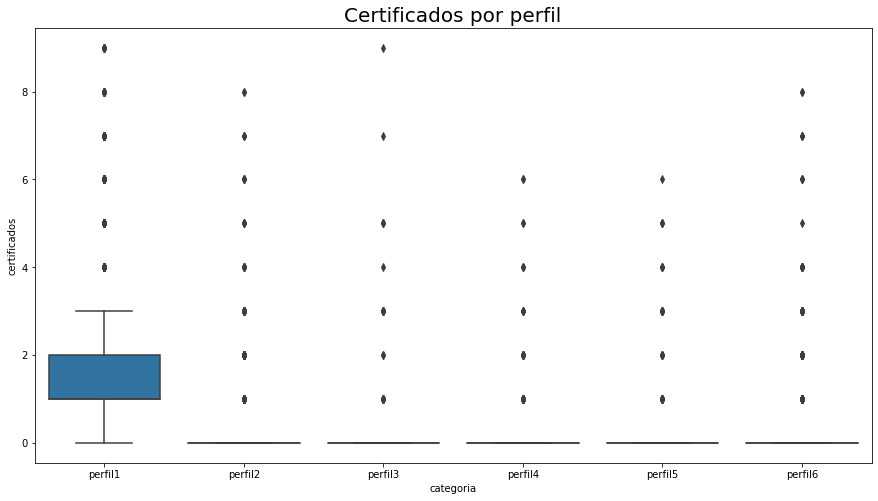

In [76]:
y = treino.query('certificados < 10')['certificados']
fig = plt.figure(figsize=(15,8))
ax = sns.boxplot(x=treino['categoria'].sort_values(), y=(y), data=treino)
ax.set_title('Certificados por perfil', fontsize = 20);

In [68]:
descartar = ['horas_semanais_estudo']

In [74]:
treino['certificados'].value_counts(normalize=True)

0.0     0.844123
1.0     0.076901
2.0     0.028757
3.0     0.026897
4.0     0.009300
5.0     0.004292
6.0     0.003076
7.0     0.002361
8.0     0.001288
9.0     0.000787
11.0    0.000787
10.0    0.000286
17.0    0.000215
12.0    0.000215
20.0    0.000143
25.0    0.000072
13.0    0.000072
16.0    0.000072
32.0    0.000072
29.0    0.000072
15.0    0.000072
18.0    0.000072
14.0    0.000072
Name: certificados, dtype: float64

In [80]:
treino_sv = treino.copy()

In [81]:
perfil = {'perfil1':1, 'perfil2':2, 'perfil3':3, 'perfil4':4, 'perfil5':5, 'perfil6':6}

In [82]:
treino_sv['categoria'] = treino_sv['categoria'].replace(perfil)

In [83]:
treino_sv.head()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
0,915132186.0,Especialização,UNIP,Analista Senior,Eletrodomesticos,1.0,1.0,1.0,6.0,Google,28.0,5.0,4.0,0.0,6
1,183037660.0,MBA,NaN,Supervisor,e-commerce,0.0,0.0,1.0,6.0,NaN,66.0,36.0,34.0,0.0,2
2,681614019.0,Bacharelado,UNICAMP,Outros,e-commerce,1.0,1.0,1.0,10.0,Saint Paul,27.0,27.0,27.0,0.0,2
3,398921329.0,SEM FORMAÇÃO,UFRN,Outros,Eletroeletronicos,NaN,1.0,1.0,5.0,Instagram,29.0,10.0,6.0,0.0,5
4,522842284.0,Tecnólogo,INSPER INSTITUTO DE ENSINO E PESQUISA,SEM EXPERIÊNCIA,Eletrodomesticos,NaN,0.0,1.0,7.0,Google,67.0,49.0,44.0,0.0,2


In [92]:
analise = sweetviz.analyze(treino, pairwise_analysis="on")

:FEATURES DONE:                    |█████████████████████| [100%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)


Creating Associations graph... DONE!


In [93]:
report = analise.show_html('meu_report')

Report meu_report was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [94]:
report

In [95]:
descartar.append('importante_ter_certificado')

In [96]:
descartar

['horas_semanais_estudo', 'importante_ter_certificado']

## Criando um modelo

In [102]:
#features escolhidas por análise visual no  sweetviz
features = ['total_modulos', 'modulos_iniciados', 'modulos_finalizados', 'certificados']

### Tratando nulos

In [209]:
#tratando os nulos por 0
treino_1 = treino.fillna(0)

In [215]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import SimpleImputer, IterativeImputer
si = SimpleImputer(missing_values=np.nan, strategy='median')
X_mediana = si.fit_transform(treino[features])

In [216]:
X_mediana

array([[ 28.,   5.,   4.,   0.],
       [ 66.,  36.,  34.,   0.],
       [ 27.,  27.,  27.,   0.],
       ...,
       [ 30.,   9.,   8.,   0.],
       [226., 102.,  93.,   1.],
       [125.,  98.,  97.,   1.]])

In [218]:
ii = IterativeImputer()
X_ii = ii.fit_transform(treino[features])

/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [220]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')

In [140]:
X = treino_1[features]

In [141]:
X.head()

,total_modulos,modulos_iniciados,modulos_finalizados,certificados
0,28.0,5.0,4.0,0.0
1,66.0,36.0,34.0,0.0
2,27.0,27.0,27.0,0.0
3,29.0,10.0,6.0,0.0
4,67.0,49.0,44.0,0.0


In [142]:
X.shape

(15857, 4)

In [143]:
X.isna().sum()

total_modulos          0
modulos_iniciados      0
modulos_finalizados    0
certificados           0
dtype: int64

In [144]:
X.notna().sum()

total_modulos          15857
modulos_iniciados      15857
modulos_finalizados    15857
certificados           15857
dtype: int64

In [145]:
Y = treino_1['categoria']

In [146]:
len(Y)

15857

In [147]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=42, test_size=0.2)

In [151]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12685, 4)
(3172, 4)
(12685,)
(3172,)


### Modelo Base

In [152]:
from xgboost import XGBRFClassifier

In [153]:
modelo = XGBRFClassifier(random_state=42)

In [154]:
modelo.fit(X_train, y_train)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
                max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
                n_jobs=1, nthread=None, objective='multi:softprob',
                random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                seed=None, silent=None, subsample=0.8, verbosity=1)

In [155]:
y_pred = modelo.predict(X_test)

In [156]:
y_pred

array(['perfil2', 'perfil5', 'perfil5', ..., 'perfil2', 'perfil6',
       'perfil2'], dtype=object)

In [157]:
#testando a acurácia do modelo
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

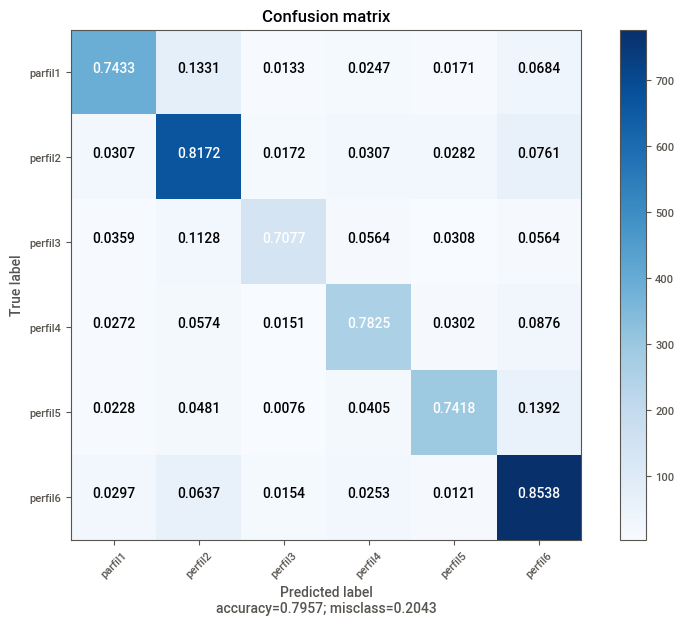

In [158]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

In [159]:
#valor a bater 79.31904161412359
accuracy_score(y_test, y_pred)*100

79.57124842370744

In [160]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     perfil1       0.84      0.74      0.79       526
     perfil2       0.78      0.82      0.80       815
     perfil3       0.76      0.71      0.73       195
     perfil4       0.75      0.78      0.76       331
     perfil5       0.83      0.74      0.78       395
     perfil6       0.80      0.85      0.83       910

    accuracy                           0.80      3172
   macro avg       0.79      0.77      0.78      3172
weighted avg       0.80      0.80      0.80      3172



### Pre-processamento dos dados

In [161]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

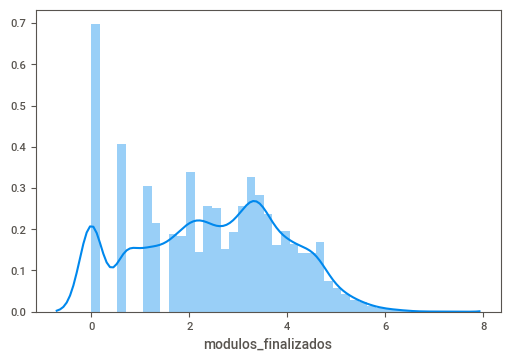

In [167]:
sns.distplot(np.log(treino.modulos_finalizados));


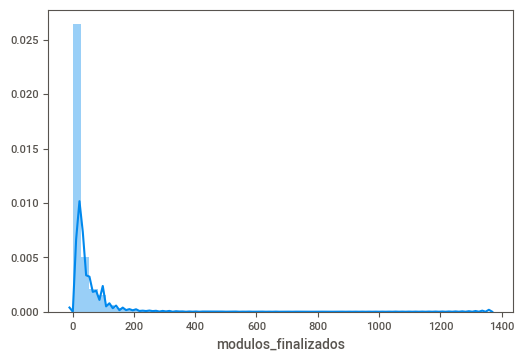

In [168]:
sns.distplot(X.modulos_finalizados);

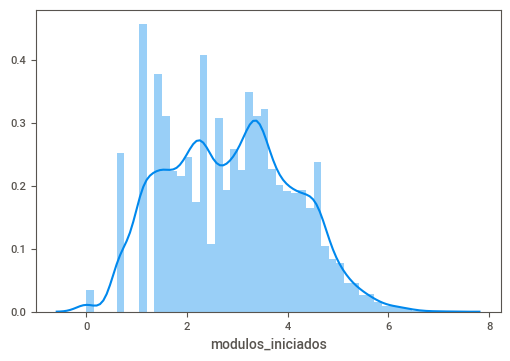

In [169]:
sns.distplot(np.log(treino.modulos_iniciados));

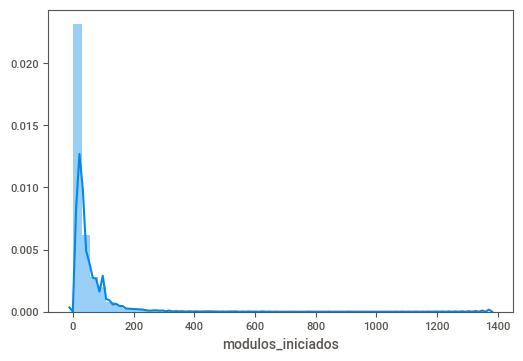

In [170]:
sns.distplot(treino.modulos_iniciados);

In [171]:
 mms = MinMaxScaler()
 st = StandardScaler()
 rs = RobustScaler()

In [172]:
X_mms = mms.fit_transform(X)

In [175]:
X.head()

,total_modulos,modulos_iniciados,modulos_finalizados,certificados
0,28.0,5.0,4.0,0.0
1,66.0,36.0,34.0,0.0
2,27.0,27.0,27.0,0.0
3,29.0,10.0,6.0,0.0
4,67.0,49.0,44.0,0.0


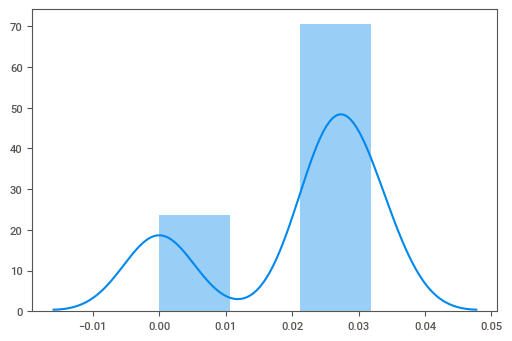

In [177]:
sns.distplot(X_mms[1]);

In [178]:
X_st = st.fit_transform(X)

In [183]:
X_rs = rs.fit_transform(X)

In [189]:
X_rs[1]

array([0.50769231, 0.6969697 , 0.86206897, 0.        ])

### Modelo com MinMaxScaler

In [193]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_mms, Y, random_state=42, test_size = 0.2)

In [194]:
modelo_mms = XGBRFClassifier()

In [195]:
modelo_mms.fit(X_treino, y_treino)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
                max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
                n_jobs=1, nthread=None, objective='multi:softprob',
                random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                seed=None, silent=None, subsample=0.8, verbosity=1)

In [196]:
y_mms = modelo_mms.predict(X_teste)

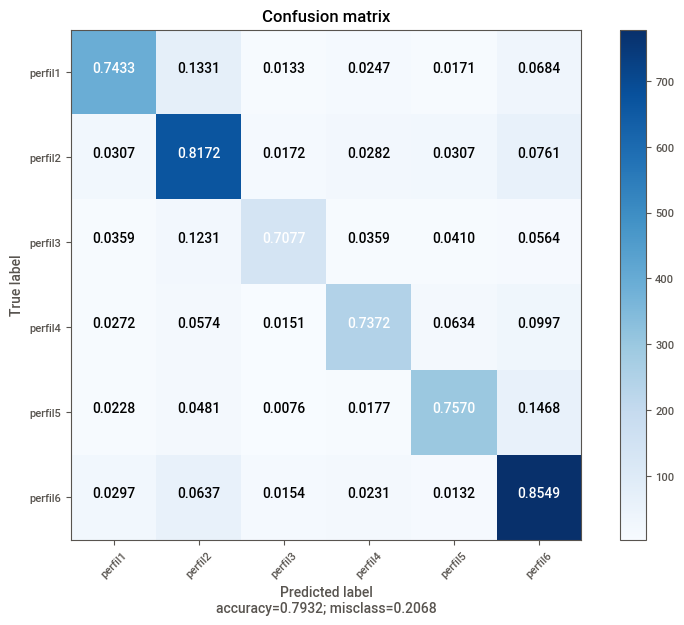

In [199]:
plot_confusion_matrix(confusion_matrix(y_teste, y_mms), ['perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

In [200]:
accuracy_score(y_teste, y_mms)

0.7931904161412359

In [201]:
print(classification_report(y_teste, y_mms))

              precision    recall  f1-score   support

     perfil1       0.84      0.74      0.79       526
     perfil2       0.78      0.82      0.80       815
     perfil3       0.76      0.71      0.73       195
     perfil4       0.77      0.74      0.76       331
     perfil5       0.80      0.76      0.78       395
     perfil6       0.80      0.85      0.82       910

    accuracy                           0.79      3172
   macro avg       0.79      0.77      0.78      3172
weighted avg       0.79      0.79      0.79      3172



### Modelo com Standard Scaler

In [202]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_st, Y, random_state=42, test_size = 0.2)

In [203]:
modelo_st = XGBRFClassifier()

In [204]:
modelo_st.fit(X_treino, y_treino)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
                max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
                n_jobs=1, nthread=None, objective='multi:softprob',
                random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                seed=None, silent=None, subsample=0.8, verbosity=1)

In [205]:
y_st = modelo_st.predict(X_teste)

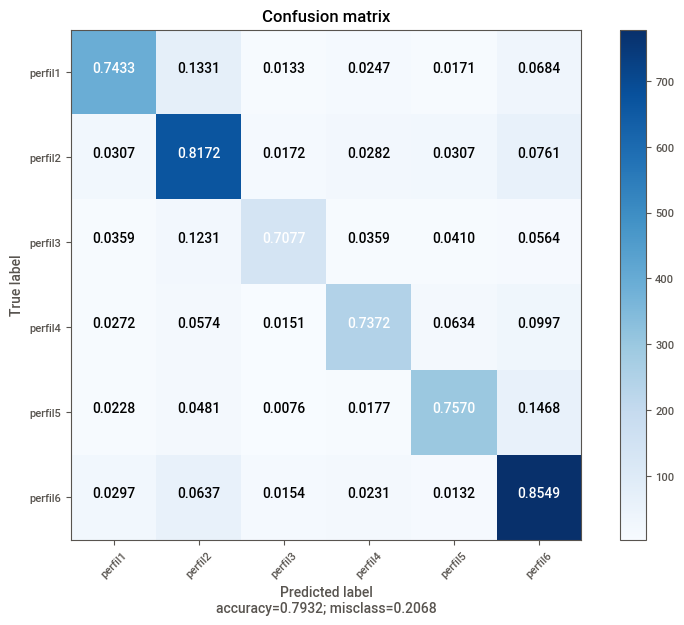

In [206]:
plot_confusion_matrix(confusion_matrix(y_teste, y_st), ['perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

In [207]:
accuracy_score(y_teste, y_st)

0.7931904161412359

In [221]:
print(classification_report(y_st, y_teste))

              precision    recall  f1-score   support

     perfil1       0.74      0.84      0.79       468
     perfil2       0.82      0.78      0.80       856
     perfil3       0.71      0.76      0.73       181
     perfil4       0.74      0.77      0.76       315
     perfil5       0.76      0.80      0.78       374
     perfil6       0.85      0.80      0.82       978

    accuracy                           0.79      3172
   macro avg       0.77      0.79      0.78      3172
weighted avg       0.80      0.79      0.79      3172



### Modelo com Robust Scaler

In [224]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_rs, Y, random_state=42, test_size = 0.2)

In [225]:
modelo_rs = XGBRFClassifier()

In [226]:
modelo_rs.fit(X_treino, y_treino)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
                max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
                n_jobs=1, nthread=None, objective='multi:softprob',
                random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                seed=None, silent=None, subsample=0.8, verbosity=1)

In [227]:
y_rs = modelo_rs.predict(X_teste)

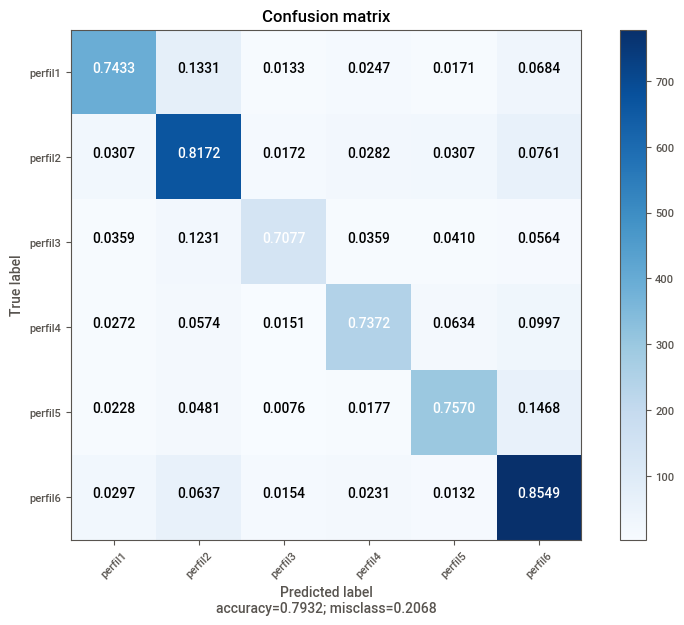

In [228]:
plot_confusion_matrix(confusion_matrix(y_teste, y_rs), ['perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

In [229]:
accuracy_score(y_teste, y_rs)

0.7931904161412359

In [230]:
print(classification_report(y_teste, y_rs))

              precision    recall  f1-score   support

     perfil1       0.84      0.74      0.79       526
     perfil2       0.78      0.82      0.80       815
     perfil3       0.76      0.71      0.73       195
     perfil4       0.77      0.74      0.76       331
     perfil5       0.80      0.76      0.78       395
     perfil6       0.80      0.85      0.82       910

    accuracy                           0.79      3172
   macro avg       0.79      0.77      0.78      3172
weighted avg       0.79      0.79      0.79      3172



In [231]:
treino[features].isna().sum()

total_modulos          1870
modulos_iniciados      1813
modulos_finalizados    1933
certificados           1878
dtype: int64

In [232]:
treino.shape

(15857, 15)

### Sem preprocessamento - sem os NA

In [233]:
treino.head()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
0,915132186.0,Especialização,UNIP,Analista Senior,Eletrodomesticos,1.0,1.0,1.0,6.0,Google,28.0,5.0,4.0,0.0,perfil6
1,183037660.0,MBA,NaN,Supervisor,e-commerce,0.0,0.0,1.0,6.0,NaN,66.0,36.0,34.0,0.0,perfil2
2,681614019.0,Bacharelado,UNICAMP,Outros,e-commerce,1.0,1.0,1.0,10.0,Saint Paul,27.0,27.0,27.0,0.0,perfil2
3,398921329.0,SEM FORMAÇÃO,UFRN,Outros,Eletroeletronicos,NaN,1.0,1.0,5.0,Instagram,29.0,10.0,6.0,0.0,perfil5
4,522842284.0,Tecnólogo,INSPER INSTITUTO DE ENSINO E PESQUISA,SEM EXPERIÊNCIA,Eletrodomesticos,NaN,0.0,1.0,7.0,Google,67.0,49.0,44.0,0.0,perfil2


In [257]:
features

['total_modulos', 'modulos_iniciados', 'modulos_finalizados', 'certificados']

In [258]:
colunas = features + ['categoria']

In [259]:
colunas

['total_modulos',
 'modulos_iniciados',
 'modulos_finalizados',
 'certificados',
 'categoria']

In [260]:
treino2 = treino[colunas].dropna(axis=0)

In [261]:
treino2.shape

(9618, 5)

In [262]:
treino2.head()

,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
0,28.0,5.0,4.0,0.0,perfil6
1,66.0,36.0,34.0,0.0,perfil2
2,27.0,27.0,27.0,0.0,perfil2
3,29.0,10.0,6.0,0.0,perfil5
4,67.0,49.0,44.0,0.0,perfil2


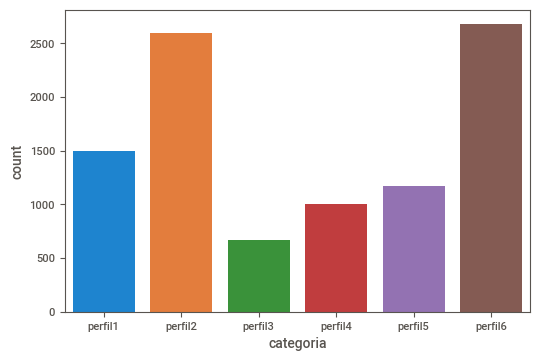

In [265]:
sns.countplot(treino2.categoria.sort_values());

In [266]:
X_notna = treino2[features]
Y_notna = treino2['categoria']

In [268]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_notna, Y_notna, random_state=42, test_size=0.2)

In [269]:
modelo_notna = XGBRFClassifier()

In [270]:
modelo_notna.fit(X_treino, y_treino)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
                max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
                n_jobs=1, nthread=None, objective='multi:softprob',
                random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                seed=None, silent=None, subsample=0.8, verbosity=1)

In [271]:
y_pred_nn = modelo_notna.predict(X_teste)

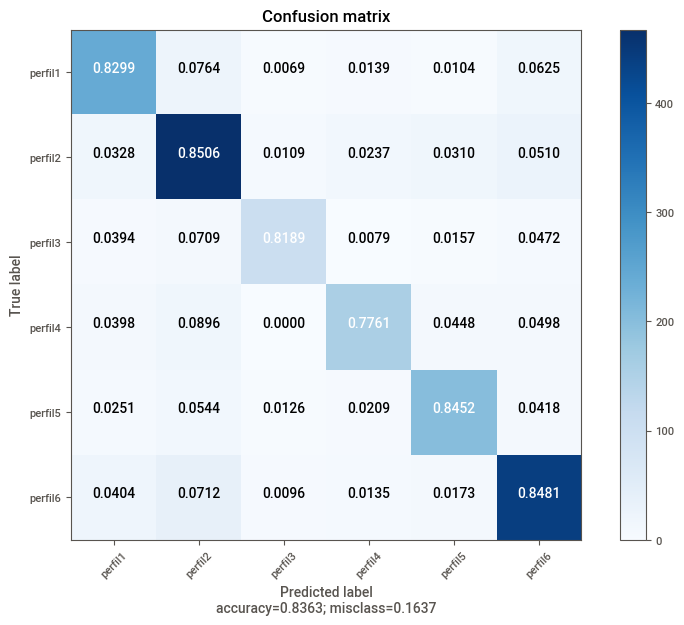

In [272]:
plot_confusion_matrix(confusion_matrix(y_teste, y_pred_nn), ['perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

In [274]:
#acurácia treinando sem os dados nulos
accuracy_score(y_teste, y_pred_nn)*100

83.62785862785863

In [276]:
print(classification_report(y_teste, y_pred_nn))

              precision    recall  f1-score   support

     perfil1       0.80      0.83      0.82       288
     perfil2       0.83      0.85      0.84       549
     perfil3       0.87      0.82      0.84       127
     perfil4       0.84      0.78      0.81       201
     perfil5       0.83      0.85      0.84       239
     perfil6       0.86      0.85      0.85       520

    accuracy                           0.84      1924
   macro avg       0.84      0.83      0.83      1924
weighted avg       0.84      0.84      0.84      1924



### Imputando os nulos com a mediana

In [277]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_mediana, Y, random_state=42, test_size=0.2)

In [283]:
modelo_mediana = XGBRFClassifier()

In [284]:
modelo_mediana.fit(X_treino, y_treino)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
                max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
                n_jobs=1, nthread=None, objective='multi:softprob',
                random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                seed=None, silent=None, subsample=0.8, verbosity=1)

In [285]:
y_mediana = modelo_mediana.predict(X_teste)

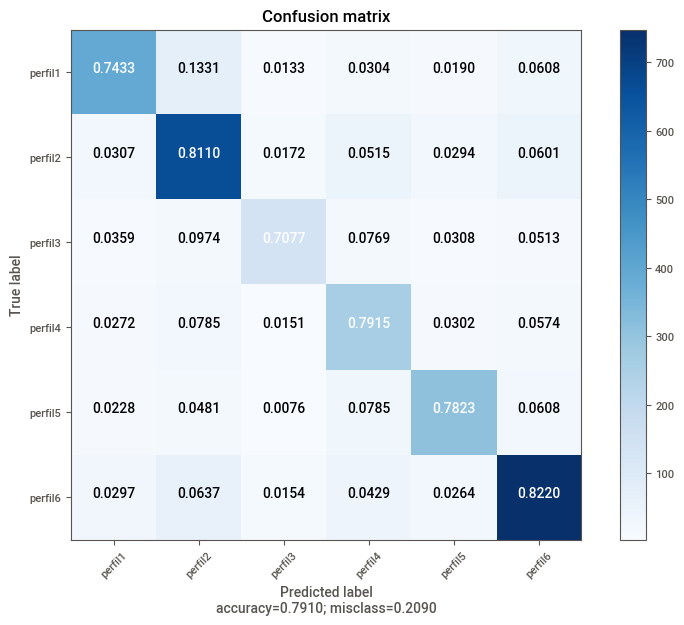

In [286]:
plot_confusion_matrix(confusion_matrix(y_teste, y_mediana), ['perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

In [287]:
print(classification_report(y_teste, y_mediana))

              precision    recall  f1-score   support

     perfil1       0.84      0.74      0.79       526
     perfil2       0.77      0.81      0.79       815
     perfil3       0.76      0.71      0.73       195
     perfil4       0.65      0.79      0.71       331
     perfil5       0.81      0.78      0.79       395
     perfil6       0.85      0.82      0.83       910

    accuracy                           0.79      3172
   macro avg       0.78      0.78      0.78      3172
weighted avg       0.80      0.79      0.79      3172



### Imputando os nulos com o IterativeImputer

In [291]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_ii, Y, random_state=42, test_size=0.2)

In [292]:
modelo_ii = XGBRFClassifier()

In [293]:
modelo_ii.fit(X_treino, y_treino)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
                max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
                n_jobs=1, nthread=None, objective='multi:softprob',
                random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                seed=None, silent=None, subsample=0.8, verbosity=1)

In [294]:
y_ii = modelo_ii.predict(X_teste)

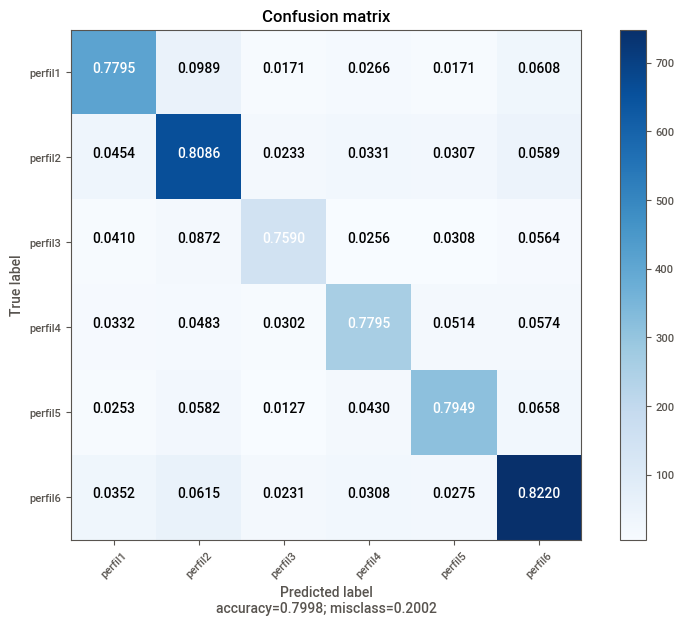

In [295]:
plot_confusion_matrix(confusion_matrix(y_teste, y_ii), ['perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

In [296]:
print(classification_report(y_teste, y_ii))

              precision    recall  f1-score   support

     perfil1       0.81      0.78      0.79       526
     perfil2       0.80      0.81      0.80       815
     perfil3       0.70      0.76      0.73       195
     perfil4       0.74      0.78      0.76       331
     perfil5       0.79      0.79      0.79       395
     perfil6       0.85      0.82      0.83       910

    accuracy                           0.80      3172
   macro avg       0.78      0.79      0.79      3172
weighted avg       0.80      0.80      0.80      3172



### Modelo com SMOTE e sem NA

In [314]:
treino2.head()

,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
0,28.0,5.0,4.0,0.0,perfil6
1,66.0,36.0,34.0,0.0,perfil2
2,27.0,27.0,27.0,0.0,perfil2
3,29.0,10.0,6.0,0.0,perfil5
4,67.0,49.0,44.0,0.0,perfil2


In [305]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_notna, Y_notna, random_state=42, test_size=0.2)

In [310]:
#balanceando o treino
X_smote, y_smote = smote.fit_resample(X_treino, y_treino)

In [311]:
modelo_smote = XGBRFClassifier()

In [312]:
modelo_smote.fit(X_smote, y_smote)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
                max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
                n_jobs=1, nthread=None, objective='multi:softprob',
                random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                seed=None, silent=None, subsample=0.8, verbosity=1)

In [315]:
y_smote = modelo_smote.predict(X_teste.values)

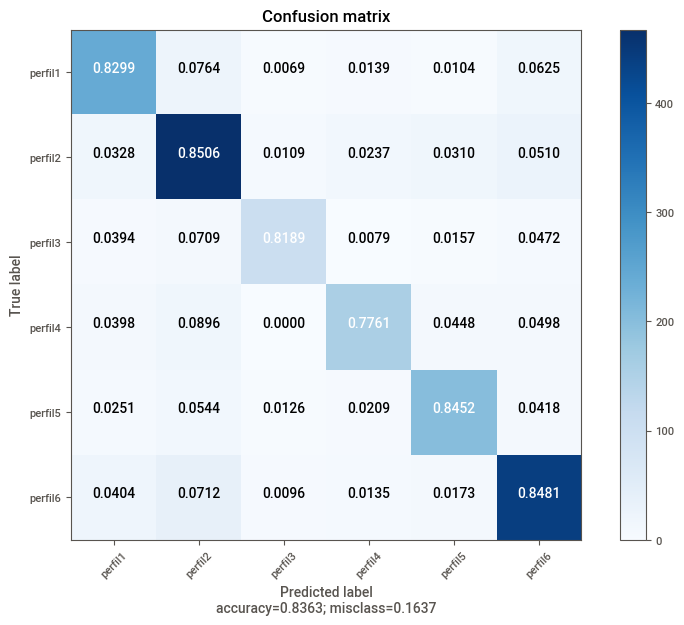

In [316]:
plot_confusion_matrix(confusion_matrix(y_teste, y_smote), ['perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

In [318]:
accuracy_score(y_teste, y_smote)*100

83.62785862785863

In [319]:
print(classification_report(y_teste, y_smote))

              precision    recall  f1-score   support

     perfil1       0.80      0.83      0.82       288
     perfil2       0.83      0.85      0.84       549
     perfil3       0.87      0.82      0.84       127
     perfil4       0.84      0.78      0.81       201
     perfil5       0.83      0.85      0.84       239
     perfil6       0.86      0.85      0.85       520

    accuracy                           0.84      1924
   macro avg       0.84      0.83      0.83      1924
weighted avg       0.84      0.84      0.84      1924



## Brincando com o TPOT (de novo)

In [320]:
X_notna

,total_modulos,modulos_iniciados,modulos_finalizados,certificados
0,28.0,5.0,4.0,0.0
1,66.0,36.0,34.0,0.0
2,27.0,27.0,27.0,0.0
3,29.0,10.0,6.0,0.0
4,67.0,49.0,44.0,0.0
...,...,...,...,...
15847,515.0,166.0,102.0,0.0
15848,54.0,37.0,31.0,0.0
15854,30.0,9.0,8.0,0.0
15855,226.0,102.0,93.0,1.0


In [321]:
Y_notna

0        perfil6
1        perfil2
2        perfil2
3        perfil5
4        perfil2
          ...   
15847    perfil4
15848    perfil2
15854    perfil5
15855    perfil1
15856    perfil1
Name: categoria, Length: 9618, dtype: object

In [322]:
!pip install tpot

     |████████████████████████████████| 92kB 2.3MB/s 
     |████████████████████████████████| 163kB 8.0MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=4f26f37700198d3972a3a487cdedb479c6b01f032b8d91dc56cec58e5f5194ba
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [323]:
from tpot import TPOTClassifier

In [328]:
tpot = TPOTClassifier(generations=5, verbosity=2)

In [329]:
tpot.fit(X_notna, Y_notna)


Generation 1 - Current best internal CV score: 0.8394679030404459
Generation 2 - Current best internal CV score: 0.8394679030404459
Generation 3 - Current best internal CV score: 0.8394679030404459
Generation 4 - Current best internal CV score: 0.8394679030404459
Generation 5 - Current best internal CV score: 0.8394679030404459
Best pipeline: XGBClassifier(input_matrix, learning_rate=0.01, max_depth=8, min_child_weight=20, n_estimators=100, nthread=1, subsample=0.45)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               log_file=<ipykernel.iostream.OutStream object at 0x7f895fd5de10>,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [330]:
tpot.export('desafio6.py')

### Rodando o modelo do TPOT

In [331]:
from xgboost import XGBClassifier

In [332]:
modelo_tpot = XGBClassifier(learning_rate=0.01, max_depth=8, min_child_weight=20, n_estimators=100, nthread=1, subsample=0.45)

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X_notna, Y_notna, random_state=42, test_size=0.2)

In [335]:
modelo_tpot.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=20, missing=None, n_estimators=100, n_jobs=1,
              nthread=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.45, verbosity=1)

In [336]:
y_tpot = modelo_tpot.predict(X_test)

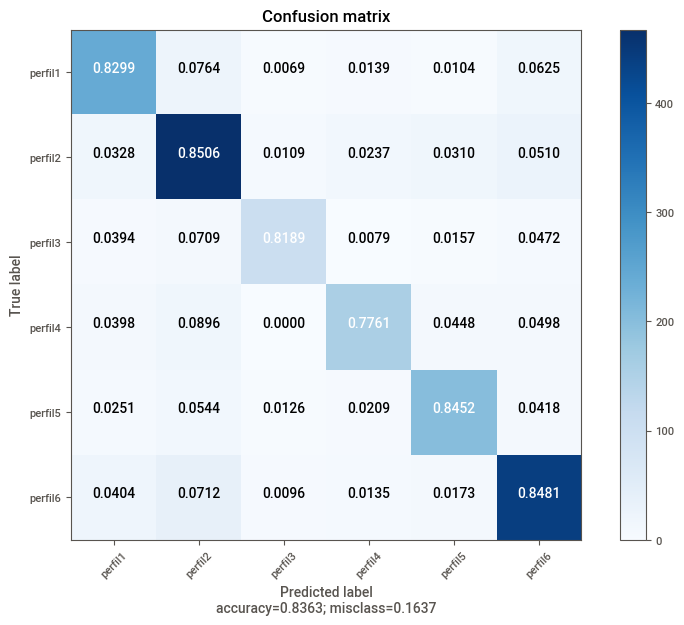

In [337]:
plot_confusion_matrix(confusion_matrix(y_test, y_tpot), ['perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

In [338]:
accuracy_score(y_test, y_tpot)

0.8362785862785863

In [339]:
print(classification_report(y_test, y_tpot))

              precision    recall  f1-score   support

     perfil1       0.80      0.83      0.82       288
     perfil2       0.83      0.85      0.84       549
     perfil3       0.87      0.82      0.84       127
     perfil4       0.84      0.78      0.81       201
     perfil5       0.83      0.85      0.84       239
     perfil6       0.86      0.85      0.85       520

    accuracy                           0.84      1924
   macro avg       0.84      0.83      0.83      1924
weighted avg       0.84      0.84      0.84      1924

